In [4]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\chris\\Desktop\\Data_Analytics_Class\\Module_5\\PyBer_Analysis'

In [6]:
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [7]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [8]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left")

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
# Get the total rides for each city type
ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [19]:
# Get the total drivers for each city type
driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [13]:
#Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [14]:
# Get the average fare per ride for each city type

average_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [21]:
# Get the average fare per driver for each city type

average_fare_per_driver = total_fares/driver_count
average_fare_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
# Create a PyBer summary DataFrame

data = {

  'Total Rides': [1625, 625, 125],
    'Total Drivers': [2405, 490, 78],
    'Total Fares': [39854.38, 19356.33, 4327.93],
    'Average Fare per Ride': ['$24.53', '$30.97', '$34.62'],
    'Average Fare per Driver': ['$16.57', '$39.50', '$55.49']
  
}

summary_df = pd.DataFrame(data, index=['Urban', 'Suburban', 'Rural'])


print(summary_df) 

          Total Rides  Total Drivers  Total Fares Average Fare per Ride  \
Urban            1625           2405     39854.38                $24.53   
Suburban          625            490     19356.33                $30.97   
Rural             125             78      4327.93                $34.62   

         Average Fare per Driver  
Urban                     $16.57  
Suburban                  $39.50  
Rural                     $55.49  


In [13]:
summary_df["Total Fares"] = '$' + summary_df["Total Fares"].map('{:,}'.format)

In [14]:
summary_df["Total Rides"] = summary_df["Total Rides"].map('{:,}'.format)

In [15]:
summary_df["Total Drivers"] = summary_df["Total Drivers"].map('{:,}'.format)

In [16]:
print(summary_df)

         Total Rides Total Drivers Total Fares Average Fare per Ride  \
Urban          1,625         2,405  $39,854.38                $24.53   
Suburban         625           490  $19,356.33                $30.97   
Rural            125            78   $4,327.93                $34.62   

         Average Fare per Driver  
Urban                     $16.57  
Suburban                  $39.50  
Rural                     $55.49  


In [17]:
summary_df.style

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


In [9]:
# Deliverable 2
# Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

new_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [10]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

new_df = new_df.reset_index()



In [17]:
date_df = new_df.pivot(index = "date", columns = "type", values = "fare")

date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [19]:
dateloc_df = date_df.loc['2019-01-01' : '2019-04-28']

dateloc_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [23]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

dateloc_df.index = pd.to_datetime(dateloc_df.index)

In [29]:
dateloc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [35]:
week_df = dateloc_df.resample("W").sum()
week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


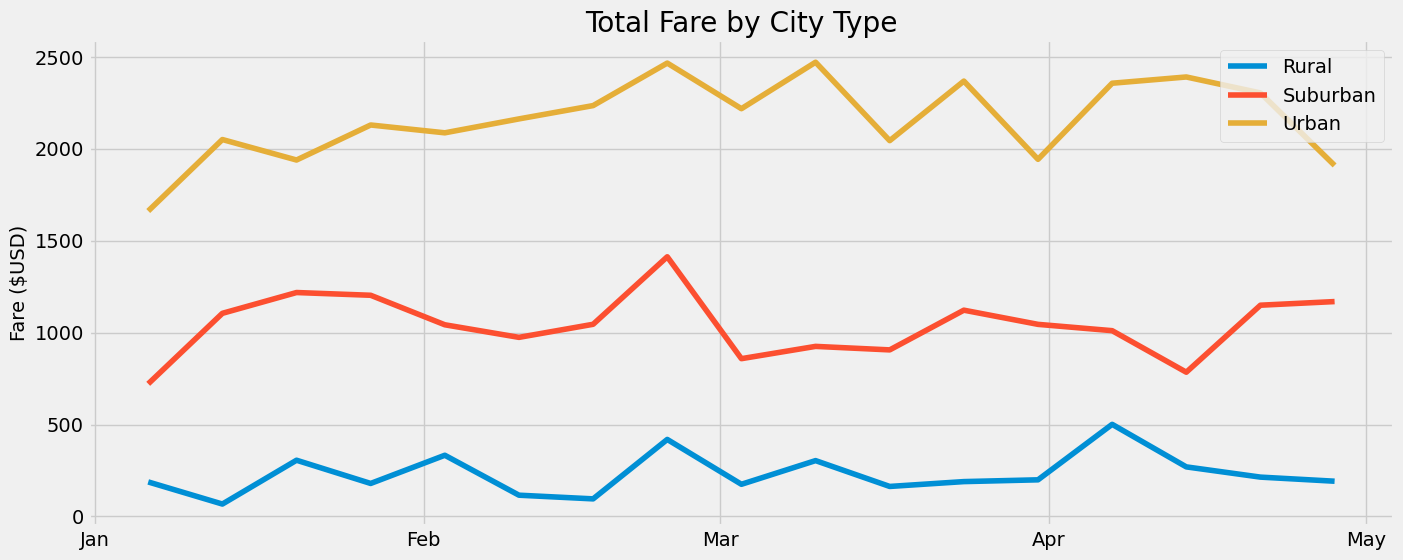

In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.dates as mdates

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(week_df)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS"))
ax.set_title("Total Fare by City Type")
# Make ticks on occurrences of each month:
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Get only the month to show in the x-axis:
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(["Rural","Suburban","Urban"])
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Save the figure.
plt.savefig("PyBer_fare_summary.png")